## Setup

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [4]:
'''## Import Dataset

# Importing the dataset
dataset = pd.read_csv('50_startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values'''

"## Import Dataset\n\n# Importing the dataset\ndataset = pd.read_csv('50_startups.csv')\nX = dataset.iloc[:, :-1].values\ny = dataset.iloc[:, 4].values"

In [5]:
'''## Prepare the data

# Encoding categorical data
# Encoding the Independent Variable

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

## Take out dummy variable

X = X[:, 1:]
XX = X # Preserving this so I can compare models at the end

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'''

'## Prepare the data\n\n# Encoding categorical data\n# Encoding the Independent Variable\n\nfrom sklearn.preprocessing import LabelEncoder, OneHotEncoder\nlabelencoder_X = LabelEncoder()\nX[:, 3] = labelencoder_X.fit_transform(X[:, 3])\nonehotencoder = OneHotEncoder(categorical_features = [3])\nX = onehotencoder.fit_transform(X).toarray()\n\n## Take out dummy variable\n\nX = X[:, 1:]\nXX = X # Preserving this so I can compare models at the end\n\n# Splitting the dataset into the Training set and Test set\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [32]:
class regressor_SKL(object):

    def __init__(self, data, opt_index):
        from sklearn.preprocessing import LabelEncoder, OneHotEncoder
        from sklearn.model_selection import train_test_split
        self.dataset = pd.read_csv(data)
        self.X = self.dataset.iloc[:, :-1].values
        self.y = self.dataset.iloc[:, 4].values
        
        self.labelencoder_X = LabelEncoder()
        self.X[:, 3] = self.labelencoder_X.fit_transform(self.X[:, 3])
        self.onehotencoder = OneHotEncoder(categorical_features = [3])

        
        self.X = self.onehotencoder.fit_transform(self.X).toarray()
        self.X = self.X[:, 1:]
        self.X = self.X[:, opt_index]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.2, random_state = 0)
        
        from sklearn.linear_model import LinearRegression
        self.regressor = LinearRegression()
        self.regressor.fit(self.X_train, self.y_train)
        self.y_pred = self.regressor.predict(self.X_test)
        

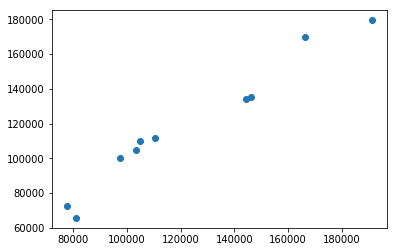

In [40]:
data = '50_startups.csv'
idx = [0,1,2,3]
non_opt = regressor_SKL(data, idx)
plt.scatter(non_opt.y_test, non_opt.y_pred)
plt.show()


In [8]:
'''
plt.scatter(non_opt.y_test, non_opt.y_pred, color='red')
plt.show()
'''

"\nplt.scatter(non_opt.y_test, non_opt.y_pred, color='red')\nplt.show()\n"

In [59]:
class optimized_MLS(object):
    def __init__(self, data, init_index, sig_level):
        from sklearn.preprocessing import LabelEncoder, OneHotEncoder
        from sklearn.model_selection import train_test_split
        self.data = data
        self.dataset = pd.read_csv(self.data) # read data
        self.X = self.dataset.iloc[:, :-1].values # matrix of ind var
        self.y = self.dataset.iloc[:, 4].values    # matrix of dep var
        self.init_index = init_index 
        self.labelencoder_X = LabelEncoder() # set up label encoder object for encoding cat var
        self.X[:, 3] = self.labelencoder_X.fit_transform(self.X[:, 3]) # set cat var col to index 3
        self.onehotencoder = OneHotEncoder(categorical_features = [3]) # one hot encode col 3
        self.X = self.onehotencoder.fit_transform(self.X).toarray() # finish on hot encode
        self.X = self.X[:, 1:] # remove Nth dummy variable (leave N-1 total)
        self.X_train, self.X_test, self.y_train, self.y_test = \
        train_test_split(self.X, self.y, test_size = 0.2, random_state = 0) ## split data in to train/test
        
        import statsmodels.formula.api as sm
        self.X = np.append(arr = np.ones((50,1)).astype(int), values = self.X, axis = 1) # add col of ones to beginning of ind 
        # var matrix
        self.X_opt = self.X[:, self.init_index] # initialize X_opt with initial col of zeros, N-1 dummy var, and rest of ind var
        

        self.numVar = len(self.X_opt[0]) # determine number of ind vars for looping



## Loop over all variables, compute OLS and iteratively do backward elimination, resulting in data cols to be used for opt model
        for j in range(self.numVar):

            self.regressor_OLS = sm.OLS(endog = self.y, exog = self.X_opt).fit()
            PVAL = self.regressor_OLS.pvalues
            temp_PV = max(PVAL).astype(float)
            if j == 0:
                print(f'Max P val before optimization is: {temp_PV}')

            if temp_PV >= sig_level:
                for i in range(len(PVAL)):
                    if PVAL[i] == temp_PV:
                        self.X_opt = np.delete(self.X_opt, i, 1)                    
                        self.init_index = np.delete(self.init_index,i)
            
        print(f'Max Pval after optimization is: {temp_PV}')
        print(self.regressor_OLS.summary())

        

        # remove index of 1's col, re index init_index to correpond to matrix for sci-kit learn regressor
        for i in range(len(self.init_index)):
            self.init_index[i] = self.init_index[i] -1
        self.init_index = self.init_index[1:]
        # call sci-kit learn regression model for optimal variables
        self.opt_model = regressor_SKL(self.data, self.init_index)
        print(f'passed index is {self.init_index}')
        


Max P val before optimization is: 0.9897941241608164
Max Pval after optimization is: 2.7826969229653594e-24
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           3.50e-32
Time:                        11:40:25   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

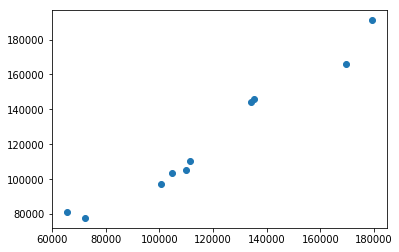

In [60]:
data = '50_startups.csv'
idx2 = [0,1,2,3,4,5]  ## First val is intercept, next items are numDummyVars - 1, next are remaining dependent variables
sl = 0.05 ## significance level

zidane = optimized_MLS(data, idx2, sl)
plt.scatter(zidane.opt_model.y_pred, zidane.opt_model.y_test)
plt.show()

In [52]:
a = [1,2,3,4,5]
for i in range(len(a)):
    a[i] = a[i] -1
b = a[1:]   
print(a)
print(b)

[0, 1, 2, 3, 4]
[1, 2, 3, 4]
